# Results

- Best Model parameters: XGBClassifier ('learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8)
- Mean Cross validation score of Best model: 0.8514
- Test score of best model  :0.8444
- Train score of best model :0.9126

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [6]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [7]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [9]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [10]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [11]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Ms.            1
the            1
Mme.           1
Capt.          1
Lady.          1
Jonkheer.      1
Sir.           1
Don.           1
Name: Title, dtype: int64

In [12]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [13]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [14]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [17]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [18]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )
#print(f'Val size is {X_val.shape}' )

Train size is (801, 10)
Test size is (90, 10)


In [19]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     801 non-null    int64  
 1   Sex        801 non-null    object 
 2   Age        643 non-null    float64
 3   SibSp      801 non-null    int64  
 4   Parch      801 non-null    int64  
 5   Fare       801 non-null    float64
 6   Embarked   799 non-null    object 
 7   Cabin_num  175 non-null    float64
 8   Cabin_cat  179 non-null    object 
 9   Title      801 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [21]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [22]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [23]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [24]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)
#X_val=titanic_pipe.transform(X_val)

## <span class="mark">DO NOT CHANGE STEPS BEFORE THIS POINT</span>

## Logistic Regression

In [25]:
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))

#print(f'Validation score is {clf.score(X_val,y_val)}')

Mean Cross-validation scores: 0.8289906832298136

Logistic.coef_: [[-7.87791667e-01 -3.53724488e-02 -5.17813570e-01 -2.92123180e-01
   5.21513440e-03  1.14650026e-04 -1.49320843e+00 -2.88109795e-01
   1.22688441e-01 -2.77646061e-01 -3.53324374e-01  2.67279159e-01
   4.69322948e-01 -6.28308832e-01  1.02342685e+00 -6.01460129e-01
  -1.24894304e+00  1.53979136e+00  8.13518618e-01  2.51271649e-02]]
Logistic.intercept_: [4.37101267]
Logistic Performance:  0.8555555555555555


## Penalized logistic regression 

In [26]:
from sklearn.model_selection import GridSearchCV
param_lr = {'C': [1,2,3,10,100,1000,10000],'penalty':['l1', 'l2']}

grid_PLR = GridSearchCV(LogisticRegression(), param_lr, cv=5,
                          return_train_score=True)
grid_PLR.fit(X_train, y_train)
print('train score: ', grid_PLR.score(X_train, y_train))
print('test score: ', grid_PLR.score(X_test, y_test))
#print(f'Validation score is {grid_search.score(X_val,y_val)}')
print("Best parameters: {}".format(grid_PLR.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_PLR.best_score_))


train score:  0.8264669163545568
test score:  0.8555555555555555
Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.8228


## KNN

In [27]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

#print(f'Validation score is {grid_knn.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.72

KNN parameters:  {'n_neighbors': 7}
KNN Test Performance:  0.8111111111111111


## Decision Tree model

In [28]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_train,y_train))

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

#print(f'Validation score is {grid_dtree.score(X_val,y_val)}')

Best Mean Cross-validation score: 0.8378

Decision Tree parameters:  {'max_depth': 5}
Decision Tree Performance:  0.8689138576779026
Decision Tree Performance:  0.8111111111111111


## Linear SVC¶

In [29]:
from sklearn.svm import LinearSVC

lsvm=LinearSVC()

lsvm.fit(X_train, y_train)
cv_scores1=cross_val_score(lsvm, X_train, y_train)
print('Linear SVM Train Score:', lsvm.score(X_train, y_train))
print('Linar SVM Test Score:', lsvm.score(X_test,y_test))
print("Best Mean Cross-validation score: {:.4f}".format(cv_scores.mean()))

Linear SVM Train Score: 0.5980024968789014
Linar SVM Test Score: 0.6555555555555556
Best Mean Cross-validation score: 0.8290


## Kernel SVC

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['sigmoid'],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))
             

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['sigmoid'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [31]:
from sklearn.svm import SVC, LinearSVC
ksvc_grid = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
ksvc_grid.fit(X_train, y_train)
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')
#print(f'Val score is {ksvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8227639751552795
Best Mean Cross Validation Score is {'C': 1, 'kernel': 'linear'}
Train score is 0.8314606741573034
Test score is 0.8333333333333334


## Poly SVM¶

In [32]:
param_grid = [{'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],'degree': [1,2]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print('train score: ', grid_search.score(X_train, y_train))
print('test score: ', grid_search.score(X_test, y_test))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

train score:  0.8064918851435705
test score:  0.8111111111111111
Best parameters: {'C': 100, 'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.80


# Ensemble Models¶

## Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [35]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
#print(f'Val score is {bag_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8402096273291926
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9413233458177278
Test score is 0.8


In [36]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=8,
                                                                               max_features=None,
                                                                               max_leaf_nodes=5,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               

In [37]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')
#print(f'Val score is {bag_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8027950310559007
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8214731585518102
Test score is 0.8


## Pasting

In [38]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [39]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')
#print(f'Val score is {paste_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8402018633540372
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9288389513108615
Test score is 0.8


In [40]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=8,
                                                                               max_features=None,
                                                                               max_leaf_nodes=5,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               

In [41]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')
#print(f'Val score is {paste_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8027639751552795
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.8227215980024969
Test score is 0.8


## Random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [43]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
#print(f'Val score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8826466916354557
Test score is 0.8222222222222222


## Extra-Trees

In [44]:
from  sklearn.ensemble import ExtraTreesClassifier

In [45]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [46]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
#print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8314829192546584
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.885143570536829
Test score is 0.8333333333333334


## Ada Boost

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [49]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')
#print(f'Val score is {adc_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8189906832298137
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9425717852684145
Test score is 0.8222222222222222


In [50]:
adc_svc =AdaBoostClassifier(base_estimator=SVC(kernel='rbf',probability=True),random_state=42)
adc_svc_param = {
              'base_estimator__C' : [ 0.01, 0.1, 1, 10],
              'base_estimator__gamma' :   [0.01, 0.1, 1, 10],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],          

             }
adc_svc_grid = GridSearchCV(adc_svc, adc_svc_param,cv=5, return_train_score=True, )
adc_svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=SVC(C=1.0,
                                                             break_ties=False,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma='scale',
                                                             kernel='rbf',
                                                             max_iter=-1,
                                                             probability=True,
                                                          

In [51]:
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_params_}')
print(f'Train score is {adc_svc_grid.score(X_train,y_train)}')
print(f'Test score is {adc_svc_grid.score(X_test,y_test)}')
#print(f'Val score is {adc_svc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.6367080745341615
Best Mean Cross Validation Score is {'base_estimator__C': 0.01, 'base_estimator__gamma': 10, 'learning_rate': 2, 'n_estimators': 100}
Train score is 0.6367041198501873
Test score is 0.5666666666666667


## Gradient Boost¶

In [52]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [53]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
#print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8289829192546584
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9300873907615481
Test score is 0.8222222222222222


## XGBoost

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
from xgboost import XGBClassifier

In [56]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

In [57]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
#print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8514285714285714
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Train score is 0.9126092384519351
Test score is 0.8444444444444444


# Summary

In [60]:
classifiers={'knn': grid_knn,
             'logreg':grid_PLR,
             'Polysvc':grid_search,
             'ksvc':ksvc_grid,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             #'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             #'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [61]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'Polysvc', 'ksvc', 'dtree', 'bag_dtree1', 'paste_dtree1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [62]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [63]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [64]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
11,xgbc,0.851429,0.022193
7,rfc,0.840217,0.017764
4,dtree,0.837793,0.046643
8,etc,0.831483,0.020331
10,gbc,0.828983,0.021697
3,ksvc,0.822764,0.029431
1,logreg,0.822756,0.020415
9,adc_dtree,0.818991,0.018804
5,bag_dtree1,0.802795,0.032382
2,Polysvc,0.802780,0.027567


In [65]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [66]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

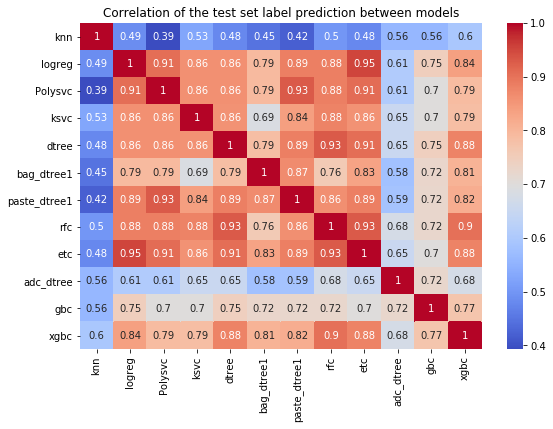

In [67]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [69]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [70]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
knn  Polysvc         0.392953
     paste_dtree1    0.420227
     bag_dtree1      0.447988
     dtree           0.480042
     etc             0.480042
dtype: float64


# Stacking¶

## Voting top 5

In [71]:
grid_PLR.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
from sklearn.ensemble import VotingClassifier

In [73]:
vclf1 = VotingClassifier(estimators=
                              [  
                                  
                               ('logreg', grid_PLR.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('xgbc', xgbc_grid.best_estimator_),
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('logreg',
                                                     LogisticRegression(C=1,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                            

In [74]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8414751552795032
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8764044943820225
Test score is 0.8444444444444444


In [75]:
vclf2 = VotingClassifier(estimators=
                              [('logreg', grid_PLR.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               
                               
                               ('xgbc', xgbc_grid.best_estimator_),
                                                            ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('logreg',
                                                     LogisticRegression(C=1,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                            

In [76]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8439673913043478
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.8801498127340824
Test score is 0.8333333333333334


## Voting Least Correlated

In [79]:
vclf3 = VotingClassifier(estimators=
                              [('dtree', grid_dtree.best_estimator_), 
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_), 
                               ('paste_dtree1', paste_dtree1_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('dtree',
                                                     DecisionTreeClassifier(ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=5,
                                                                            max_features=None,
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                         

In [78]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
#print(f'Val score is {vclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8364673913043479
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.9138576779026217
Test score is 0.8111111111111111


## Stacking Top 5

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
sclf1 = StackingClassifier(estimators=
                              [('logreg', grid_PLR.best_estimator_), 
                               ('dtree', grid_dtree.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('xgbc', xgbc_grid.best_estimator_),
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('logreg',
                                                       LogisticRegression(C=1,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                                           

In [82]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8452018633540372
Best Mean Cross Validation Score is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.885143570536829
Test score is 0.8444444444444444


## Stacking Least Correlated

In [83]:
sclf2 = StackingClassifier(estimators=
                              [('paste_dtree1', paste_dtree1_grid.best_estimator_), 
                               ('knn', grid_knn.best_estimator_), 
                                                             ], 
                           final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('paste_dtree1',
                                                       BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                               class_weight=None,
                                                                                                               criterion='gini',
                                                                                                               max_depth=8,
                                                                                                               max_features=None,
                                                                                                               max_leaf_nodes=None,
                                                                       

In [84]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
#print(f'Val score is {sclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.8364440993788819
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 7, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 0.9, 'stack_method': 'auto'}
Train score is 0.9288389513108615
Test score is 0.8111111111111111
